In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Plotly 설치하기

In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
# 그림파일로 추출을 하려면 kaleido라는 별도의 패키지 설치가 필요

In [27]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [28]:
# 추세선 기능을 활용하기 위해선 statsmodels 패키지를 추가 설치

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [30]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [31]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
pio.templates
from plotly.subplots import make_subplots

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [32]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 텍스트를 제대로 표시하기 위해 'font.family' 사용
plt.rcParams['font.family'] = 'AppleGothic'

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [34]:
# 최종 전세 파일 오픈 
housing_price = pd.read_csv('./data_1/강남구전세데이터_찐마지막.csv', encoding='utf-8')
housing_price.head()

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500


In [35]:
df = housing_price

In [36]:
# Cont_Date 문자열 형태 -> datetime 으로 변경
df['Cont_Date'] = df['Cont_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AD_Code         87361 non-null  int64         
 1   Admin_District  87361 non-null  object        
 2   Area            87361 non-null  float64       
 3   YearBuilt       87361 non-null  int64         
 4   Type            87361 non-null  object        
 5   Floor           87361 non-null  float64       
 6   Address         87361 non-null  object        
 7   Cont_Date       87361 non-null  datetime64[ns]
 8   Age             87361 non-null  int64         
 9   Latitude        87361 non-null  float64       
 10  Longitude       87361 non-null  float64       
 11  Star_Cnt        87361 non-null  int64         
 12  Michelin_Cnt    87361 non-null  int64         
 13  Mc_cnt          87361 non-null  int64         
 14  Bigstore_cnt    87361 non-null  int64         
 15  In

In [38]:
df['AD_Code'].value_counts()
df['Admin_District'].value_counts()
df['Type'].value_counts()

9     14741
2     13290
0     10842
3      7445
1      7022
4      6350
11     5586
8      4578
12     4458
6      4141
13     3962
5      2556
7      1624
10      766
Name: AD_Code, dtype: int64

역삼동     14741
대치동     13290
개포동     10842
도곡동      7445
논현동      7022
삼성동      6350
일원동      5586
압구정동     4578
자곡동      4458
수서동      4141
청담동      3962
세곡동      2556
신사동      1624
율현동       766
Name: Admin_District, dtype: int64

아파트      53963
연립다세대    15781
단독다가구     9472
오피스텔      8145
Name: Type, dtype: int64

In [39]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,3,1,1,1,2.64,0,0,1,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,3,17,0,2,2.74,0,0,1,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,3,31,1,2,2.64,0,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,1,0,0,0,2.44,0,0,1,3000


# TOP 5 : 행정구역별 + 평균 보증금 추이

### 특성공학
    * 특징 구축방법으로 주로 진행
    
    * 평균 보증금과 대출 금리, 두 변수 간의 관계에서 대출 금리의 변동에 따라 보증금이 어떻게 변할 수 있는지를 밴드를 사용하여 시각화하는 방향으로 수정

In [40]:
# 필터링된 데이터에서 TOP 5 해당 정보 추출
target_info = df[(df['AD_Code'].isin([3, 8, 2, 13, 4])) & (df['Admin_District'].isin(['도곡동', '압구정동', '대치동', '청담동', '삼성동']))][['AD_Code', 'Admin_District']]

# 조건에 맞는 데이터 필터링
top5_data = df[df['AD_Code'].isin(target_info['AD_Code']) & df['Admin_District'].isin(target_info['Admin_District'])]

# 중복값 제거
top5_data = top5_data.drop_duplicates()

# 이상치 제거를 위한 IQR 계산
Q1 = top5_data['y'].quantile(0.25)
Q3 = top5_data['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
top5_data = top5_data[(top5_data['y'] >= lower_bound) & (top5_data['y'] <= upper_bound)]

# 2018년부터 2022년까지의 연도 범위 정의
year_range = range(2018, 2023)

# 연도 정보를 추출하여 컬럼 추가
top5_data['year'] = top5_data['Cont_Date'].dt.year

# 동별, 연도별로 그룹화하여 보증금(y)와 대출 금리(InterestRate) 평균값 추출
grouped = top5_data.groupby(['Admin_District', 'year'])[['y', 'InterestRate']].mean().reset_index()

# 값들을 반올림하고 소수점 2번째 자리까지 나타내기
grouped['y'] = grouped['y'].round(2)
grouped['InterestRate'] = grouped['InterestRate'].round(2)

print(grouped)

   Admin_District  year         y  InterestRate
0             대치동  2018  64342.73          3.38
1             대치동  2019  68358.48          2.71
2             대치동  2020  67096.75          2.50
3             대치동  2021  80326.67          3.01
4             대치동  2022  74146.10          4.19
5             도곡동  2018  78392.76          3.39
6             도곡동  2019  77420.28          2.73
7             도곡동  2020  85981.08          2.50
8             도곡동  2021  88477.43          2.96
9             도곡동  2022  89608.22          4.23
10            삼성동  2018  58252.04          3.40
11            삼성동  2019  57495.22          2.73
12            삼성동  2020  62236.38          2.50
13            삼성동  2021  72330.98          2.97
14            삼성동  2022  70029.73          4.15
15           압구정동  2018  73156.25          3.39
16           압구정동  2019  74699.66          2.72
17           압구정동  2020  84274.40          2.50
18           압구정동  2021  91600.74          2.97
19           압구정동  2022  94720.63       

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='y'>

Text(0.5, 1.0, '강남구 Top5 보증금 평균 추이')

Text(0.5, 0, '연도')

Text(0, 0.5, '보증금')

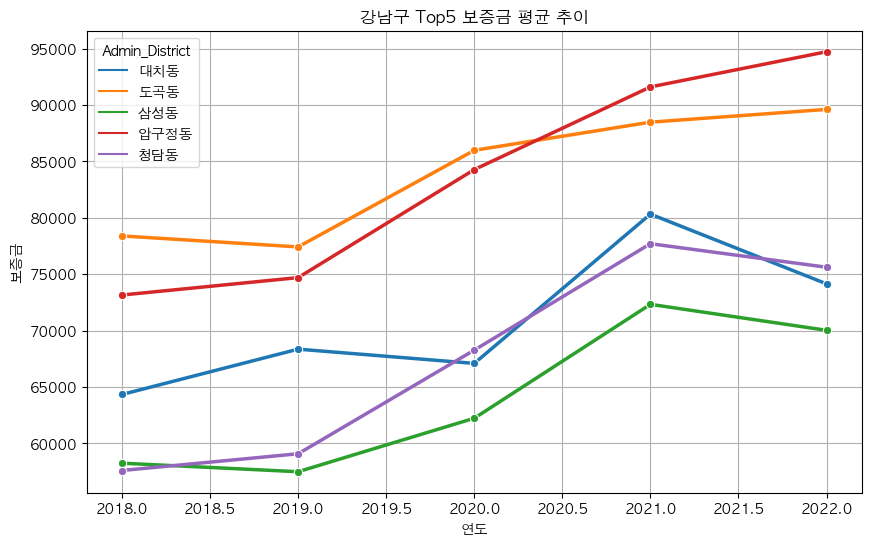

In [41]:
# 맥북용 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='y', hue='Admin_District', data=grouped, marker='o', linewidth=2.5)  # linewidth 값을 조정
plt.title('강남구 Top5 보증금 평균 추이')
plt.xlabel('연도')
plt.ylabel('보증금')
plt.legend(title='Admin_District')
plt.grid(True)
plt.show()

### Plotly 사용 버전

In [42]:
# 시각화 설정
fig = px.line(grouped, x='year', y='y', color='Admin_District',
              title='강남구 Top5 보증금 평균 추이',
              labels={'year': '연도', 'y': '평균 보증금'})

# 그래프 표시
fig.show()

## 강남구 Top 5 행정구역별 결론 

    * 행정구역별 전체 평균 보증금을 확인 했을 때 결과
     1위: 도곡동, 2위: 압구정동, 3위: 대치동, 4위: 청담동, 5위: 삼성동
 
    * 위의 그래프처럼 연도별로 확인 했을 때 결과
    
    압구정동: 가장 높은 평균 보증금을 가지고 있는 동네
    삼성동: 강남구 Top5 행정구역 중 평균적으로 가장 낮은 보증금의 동네
    청담동: 2018년도 가장 낮은 평균 보증금의 동네였으나 2022년 3위까지 올라온 동네

## Top5 행정구역별  평균 보증금과 대출금리 산점도

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='InterestRate', ylabel='y'>

Text(0.5, 1.0, '행정구역별 평균 보증금과 대출금리 산점도')

Text(0.5, 0, '대출금리')

Text(0, 0.5, '보증금')

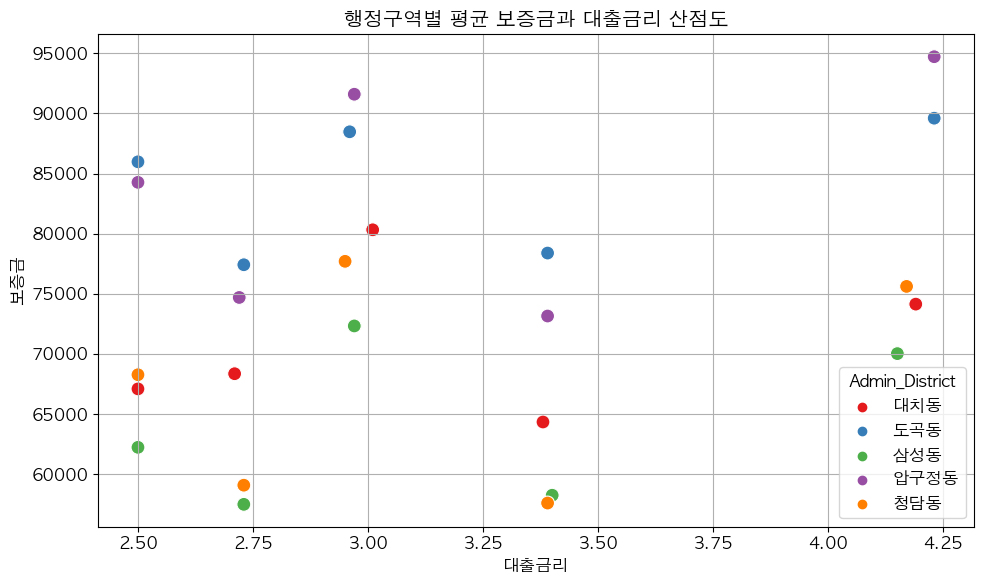

In [43]:
# 맥북용 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.weight'] = 'bold'  # 글꼴 굵기 설정
plt.rcParams['font.size'] = 12  # 글꼴 크기 설정

plt.figure(figsize=(10, 6))
sns.scatterplot(x='InterestRate', y='y', data=grouped, hue='Admin_District', palette='Set1', s=100)  # 점 크기 조정
plt.title('행정구역별 평균 보증금과 대출금리 산점도', weight='bold')  # 제목에도 글꼴 굵기 적용
plt.xlabel('대출금리', weight='bold')  # x축 레이블에도 글꼴 굵기 적용
plt.ylabel('보증금', weight='bold')  # y축 레이블에도 글꼴 굵기 적용
plt.legend(title='Admin_District', prop={'weight': 'bold'})  # 범례에도 글꼴 굵기 적용
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotly 버전

In [44]:
# Plotly 그래프 생성
fig = px.scatter(grouped, x='InterestRate', y='y', color='Admin_District', size_max=10,
                 title='행정구역별 평균 보증금과 대출금리 산점도')

# x축, y축 레이블 설정
fig.update_layout(xaxis_title='대출금리', yaxis_title='보증금')

# 범례 위치 및 사이즈 설정
fig.update_layout(legend=dict(title='Admin_District', yanchor='bottom', y=0.02, xanchor='right', x=0.98))

# 한글 폰트 설정
fig.update_layout(font_family='AppleGothic', font_size=12, title_font=dict(size=16))  # 수정된 부분

# 그래프 출력
fig.show()

## 행정구별 보증금과 대출금리 결론

    * 주요 높은 평균 보증금액대와 대출금리가 압구정동, 도곡동으로 분포가 되어있다는 걸 알 수 있었다.

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='InterestRate'>

Text(0.5, 1.0, '연도별 대출금리 평균 추이')

Text(0.5, 0, '연도')

Text(0, 0.5, '대출금리')

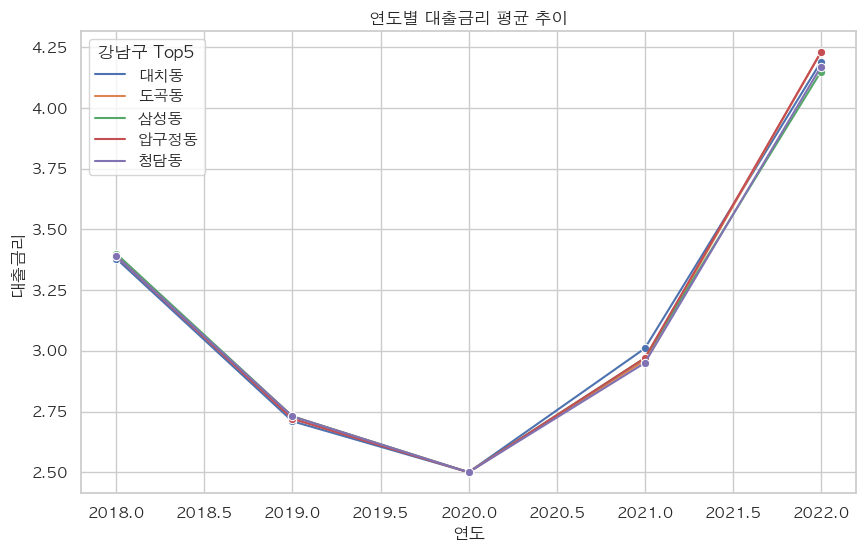

In [180]:
# 연도별 대출금리(InterestRate) 평균 추이 시각화

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.weight'] = 'bold'  # 글꼴 굵기 설정
plt.rcParams['font.size'] = 12  # 글꼴 크기 설정

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='InterestRate', hue='Admin_District', data=grouped, marker='o')
plt.title('연도별 대출금리 평균 추이')
plt.xlabel('연도')
plt.ylabel('대출금리')
plt.legend(title='강남구 Top5')
plt.grid(True)
plt.show()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AD_Code         87361 non-null  int64         
 1   Admin_District  87361 non-null  object        
 2   Area            87361 non-null  float64       
 3   YearBuilt       87361 non-null  int64         
 4   Type            87361 non-null  object        
 5   Floor           87361 non-null  float64       
 6   Address         87361 non-null  object        
 7   Cont_Date       87361 non-null  datetime64[ns]
 8   Age             87361 non-null  int64         
 9   Latitude        87361 non-null  float64       
 10  Longitude       87361 non-null  float64       
 11  Star_Cnt        87361 non-null  int64         
 12  Michelin_Cnt    87361 non-null  int64         
 13  Mc_cnt          87361 non-null  int64         
 14  Bigstore_cnt    87361 non-null  int64         
 15  In

In [183]:
# 연도별 대출 금리 선 그래프 시각화
fig = px.line(grouped, x='year', y='InterestRate', color='Admin_District',
              title='행정구역별 대출금리 비교',
              labels={'year': '연도', 'InterestRate': '대출 금리'},
              color_discrete_sequence=px.colors.qualitative.Pastel)

# 그래프 표시
fig.show()

In [182]:
# 파스텔톤 색상 지정
pastel_palette = ['#F2B5D4', '#B5EAD7', '#FFD8B1', '#FFB3B3', '#CBB4D5']

# 시각화 설정
fig = px.bar(grouped, x='year', y='y', color='Admin_District',
             color_discrete_sequence=pastel_palette,
             title='연도별 평균 보증금 by 행정구역',
             labels={'year': '연도', 'y': '평균 보증금'})

# 그래프 표시
fig.show()

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='y'>

Text(0.5, 1.0, '강남구 Top 5 보증금 비교')

Text(0.5, 0, 'year')

Text(0, 0.5, 'Deposit')

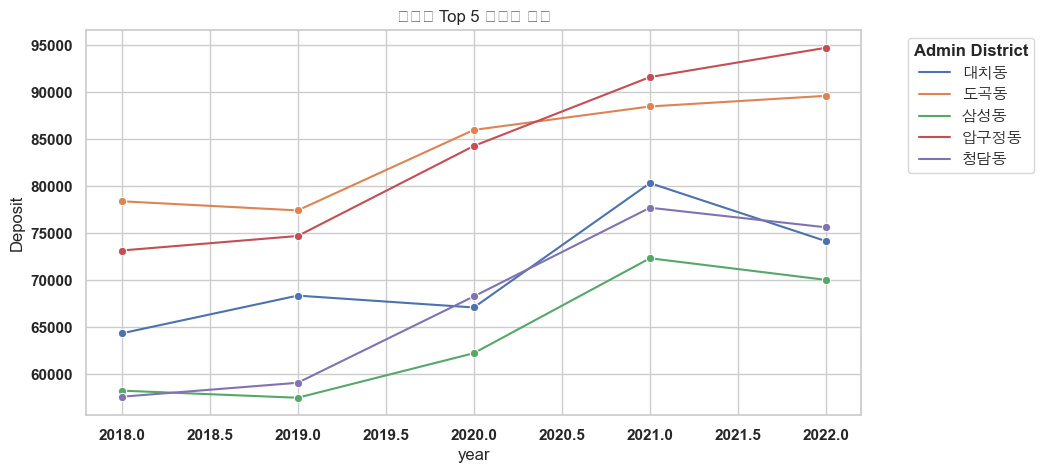

In [184]:
# 대출 금리를 제외한 강남구 Top5 행정구역에 따른 연도별 보증금액 비교 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='year', y='y', hue='Admin_District', marker='o')
plt.title("강남구 Top 5 보증금 비교")
plt.xlabel("year")
plt.ylabel("Deposit")

# 범례 설정
plt.legend(title='Admin District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', prop={'family': 'AppleGothic', 'weight': 'bold'})
plt.show()

## 도곡동 계절별 평균 보증금 결론

    1) 2018년, 2019년, 2020년, 2021년: 가을
    2) 2022년: 여름 
    3) 현재 1위 
        1위인 이유 제가 예상했을 때 (보충)
         * 강남 세브란스 병원 증축 허용(2029년 개원예정)
         * 소규모지만 도곡동 삼호아파트 재건축 -> 래미안레벤투스(분양시기 2023년)
        

## 압구정동 계절별 평균 보증금 결론

    1) 2018년: 봄 
    2) 2019년, 2020년, 2021년, 2022년: 가을 
    3) 현재 2위
    
[평당 1억대 패밀리]

    * 신현대 34" 39/5.9@11578
    * 현대3차 32" 35/5.2@10694
    * 현대6,7차 47" 49/12@10365
    * 한양 32" 33.9/6.2@10358


[평당 9천만 대 패밀리]

    * 현대1,2차 42" 40.5/9.5@9642
    * 미성1차 33" 32/6.6@9428 -> 재건축 확정
    * 미성2차 28" 27/6@9378 -> 재건죽 확정


[평당 8천만 대 패밀리]

    * 청담자이 33" 29/13@8621


[평당 7천만 대 패밀리]

    * 삼성동 현대힐스테이트1차 33" 25/11.5@7568
    * 롯데캐슬프레미어 32" 24/10.5@7471
    * 청담현대 32" 23.9/9@7302 
    
    
    - 압구정 현대 아파트-> 교수, 기업인, 연예인들이 오랜기간 동안 거주하고 있는 곳
    (이순재, 정윤희, 유재석, 김희애, 강호동, 노홍철, 최시원, 차태현, 김용만 
    - 이명박, 우병우, 이상득, 최순실(살았으나 이사감, 해당 시기엔 주민 이었음) 
    - 압구정 현대아파트가 연예인이 많이 사는 이유: 대단지 아파트고(5300가구로 추정, 한가구당 4인 가족 간다고 가정시 약 2만명 넘게 거주하는 셈), 재건축 호재가 존재(만약 재건축이 될 경우 최소 5억원 이상 수익을 볼 수 있는 매물)

# 현재 3위 / 2: 대치동 

## 대치동 계절별 평균 보증금 비교 결론 

    1) 2018년: 겨울 
    2) 2019년: 가을
    3) 2020년: 여름, 겨울
    4) 2021년, 2022년: 가을 
    5) 현재 3위
    
    * 학군, 은마아파트 재건축

# 현재 4위 / 13: 청담동 

## 청담동 계절별 평균 보증금 비교 결론 

    1) 2018년, 2020년: 겨울 
    2) 2019년, 2021년, 2022년: 가을
    3) 현재 4위
    
    * 워너청담 350억원 초호화 아파트 (2025년 12월 완공예정) -> 이전 SM 기획사 부지
    * 이미 분양이 끝난 상태라고 함
    * High-End brand shop 들이 위치 
    * 미슐랭, 블루리본 위치 
    * 이정재, 정우성 청담 건물 공동 투자 
    * 도심접근성과 프라이버시를 중시하는 사업가, 대기업 임원, 금융권 종사자, 연예인 등을 중심으로 강남지역을 거주지로 옮기고 있는 추세
    * 상지카일룸 3차의 조영남과 한채영, 최지우, 송승헌 거주

# 현재 5위 / 4: 삼성동

## 삼성동 계절별 평균 보증금 비교 결론 

    1) 2018년, 2021년, 2022년: 가을
    2) 2019년: 겨울
    3) 2020년: 여름 
    3) 현재 5위
    
    이유
    * 청담동, 압구정동 등과 함께 강남구의 부촌으로 꼽힘.
    * 코엑스, 서울무역센터, 한국도심공항, 아셈타워 등 시설과 현재 건설중인 
    현대자동차 GBC(Global Buisiness Ceter) 등 여러 기업들이 위치. 
    * 코엑스 북쪽 방향으로는 봉은사와 명문 경기고가 있고 그 뒤 쪽에는 
    삼성동 현대주택단지가 위치
    * 영동대로 건너편에 삼성도 아이파크, 서울 봉은초, 봉은중 주변에 고급 빌라 및 주택들이 위치
    * 6/17 대책 이후 삼성동은 대치동, 청담동, 잠실 등과 함께 '토지거래허가' 구역으로 묶어 이곳에서 부동산 취득하려면 강남구청장 허가를 받아야 함.
    * 이정재(원래 청담동 정우성과 위아래 층으로 거주)는 최근 삼성동에 
    신축한 최고급 빌라 라테라스를 계약
    * 장동건, 고소영, 시아준수, 이휘재, 이승기 등 거주 한다고 함.
    

## 피드백

* 계절은 강남 전체적으로만 두고
* Top 5 다른 방법으로 알아보기 - Top 5의 특징을 살린 (계절 제외)
* Top5 를 아예 한번에 엮어서 (꺾은 선 그래프로) -> 아예 한페이지에